In [172]:
import numpy as np
import gzip as gz
import matplotlib.pyplot as plt
import struct
from gpu_mlnn import GPUMultilayerNeuralNetwork, train_data

dir = "D:/Thesis_data/MNIST/"
train_img_dir = "train-images-idx3-ubyte.gz"
train_lab_dir = "train-labels-idx1-ubyte.gz"
test_img_dir  = "t10k-images-idx3-ubyte.gz"
test_lab_dir  = "t10k-labels-idx1-ubyte.gz"

inp_training = gz.open(dir+train_img_dir, 'r')

num_of_training = 60000

In [173]:
def read_idx(filename):
    with gz.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [174]:
# data processing
training_data = read_idx(dir+train_img_dir)
training_label_data = read_idx(dir + train_lab_dir)
testing_data = read_idx(dir+test_img_dir)
testing_label_data = read_idx(dir+test_lab_dir)

train_dataset = []

for i in range(np.shape(training_data)[0]):
    train_dataset.append(train_data(training_data[i].flatten(), np.array([0]*10)))
    train_dataset[i].target_array[training_label_data[i]] = 1
# print(train_dataset[5].input_array)

[0 0 0 0 0 0 0 1 0 0]


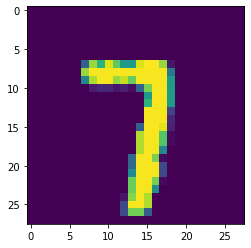

In [175]:
id = 1564
im1 = np.reshape(train_dataset[id].input_array, (28,28))
print(train_dataset[id].target_array)
plt.imshow(im1)
plt.show()


In [176]:

mlnn = GPUMultilayerNeuralNetwork([784, 64, 32, 16, 10], 0.1)

mlnn.batch_training(train_dataset, 12000, 0.2, 0.99996)


Training...


KeyboardInterrupt: 